# Load Libraries

In [1]:
import sys
sys.path.append("/home/jackh/cphmd_tools/cphmd-analysis")
import cphmdanalysis as cphmd
from cphmdanalysis import compute_pkas as pka
from cphmdanalysis import HH_fitting as pka_fit
from cphmdanalysis import plotting_lambda_data as plotting
import glob as g

# Paths, pHs, and Stages

In [2]:
path   = '/data/jackh/plasmepsin/apo_plasmepsin/run'
phs    = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5]
#phs    = [4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5]
#phs = [5.0]
sstage = 11 # 11
lstage = 65 # 65
stages = [x for x in range(sstage, lstage+1)]

# Handling and Loading Lambda Files

## Seed Files

In [3]:
files = []
for ph in phs:
    files.append(g.glob('{}/stage{}/*ph{}*lamb*'.format(path, sstage, ph)))

In [4]:
files

[['/data/jackh/plasmepsin/apo_plasmepsin/run/stage11/plasmepsin_ph1.0_temp300.0.lamb_0'],
 ['/data/jackh/plasmepsin/apo_plasmepsin/run/stage11/plasmepsin_ph1.5_temp300.0.lamb_2'],
 ['/data/jackh/plasmepsin/apo_plasmepsin/run/stage11/plasmepsin_ph2.0_temp300.0.lamb_4'],
 ['/data/jackh/plasmepsin/apo_plasmepsin/run/stage11/plasmepsin_ph2.5_temp300.0.lamb_6'],
 ['/data/jackh/plasmepsin/apo_plasmepsin/run/stage11/plasmepsin_ph3.0_temp300.0.lamb_8'],
 ['/data/jackh/plasmepsin/apo_plasmepsin/run/stage11/plasmepsin_ph3.5_temp300.0.lamb_10'],
 ['/data/jackh/plasmepsin/apo_plasmepsin/run/stage11/plasmepsin_ph4.0_temp300.0.lamb_12'],
 ['/data/jackh/plasmepsin/apo_plasmepsin/run/stage11/plasmepsin_ph4.5_temp300.0.lamb_14'],
 ['/data/jackh/plasmepsin/apo_plasmepsin/run/stage11/plasmepsin_ph5.0_temp300.0.lamb_16'],
 ['/data/jackh/plasmepsin/apo_plasmepsin/run/stage11/plasmepsin_ph5.5_temp300.0.lamb_17'],
 ['/data/jackh/plasmepsin/apo_plasmepsin/run/stage11/plasmepsin_ph6.0_temp300.0.lamb_18'],
 ['/

In [5]:
ph_objects = [cphmd.lambda_data(x[0]) for x in files]

In [6]:
print('Number of pH objects in the data list: {}'.format(len(ph_objects)))
print('Number of pH replicas used: {}'.format(len(files)))

Number of pH objects in the data list: 16
Number of pH replicas used: 16


## Add Lambda Files

In [7]:
for rep, ph in enumerate(phs):
    for stage in stages[1:]:
        file = g.glob('{}/stage{}/*ph{}*lamb*'.format(path, stage, ph))
        ph_objects[rep].add_l_file(file_path=file[0])
        print("{} Added".format(file[0]))

/data/jackh/plasmepsin/apo_plasmepsin/run/stage12/plasmepsin_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage13/plasmepsin_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage14/plasmepsin_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage15/plasmepsin_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage16/plasmepsin_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage17/plasmepsin_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage18/plasmepsin_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage19/plasmepsin_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage20/plasmepsin_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage21/plasmepsin_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage22/plasmepsin_ph1.0_temp300.0.lamb_0 Added
/data/jack

/data/jackh/plasmepsin/apo_plasmepsin/run/stage50/plasmepsin_ph1.5_temp300.0.lamb_1 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage51/plasmepsin_ph1.5_temp300.0.lamb_1 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage52/plasmepsin_ph1.5_temp300.0.lamb_1 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage53/plasmepsin_ph1.5_temp300.0.lamb_1 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage54/plasmepsin_ph1.5_temp300.0.lamb_1 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage55/plasmepsin_ph1.5_temp300.0.lamb_1 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage56/plasmepsin_ph1.5_temp300.0.lamb_1 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage57/plasmepsin_ph1.5_temp300.0.lamb_1 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage58/plasmepsin_ph1.5_temp300.0.lamb_1 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage59/plasmepsin_ph1.5_temp300.0.lamb_1 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage60/plasmepsin_ph1.5_temp300.0.lamb_1 Added
/data/jack

/data/jackh/plasmepsin/apo_plasmepsin/run/stage34/plasmepsin_ph2.5_temp300.0.lamb_4 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage35/plasmepsin_ph2.5_temp300.0.lamb_4 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage36/plasmepsin_ph2.5_temp300.0.lamb_4 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage37/plasmepsin_ph2.5_temp300.0.lamb_4 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage38/plasmepsin_ph2.5_temp300.0.lamb_4 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage39/plasmepsin_ph2.5_temp300.0.lamb_4 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage40/plasmepsin_ph2.5_temp300.0.lamb_4 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage41/plasmepsin_ph2.5_temp300.0.lamb_4 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage42/plasmepsin_ph2.5_temp300.0.lamb_4 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage43/plasmepsin_ph2.5_temp300.0.lamb_4 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage44/plasmepsin_ph2.5_temp300.0.lamb_4 Added
/data/jack

/data/jackh/plasmepsin/apo_plasmepsin/run/stage18/plasmepsin_ph3.5_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage19/plasmepsin_ph3.5_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage20/plasmepsin_ph3.5_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage21/plasmepsin_ph3.5_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage22/plasmepsin_ph3.5_temp300.0.lamb_8 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage23/plasmepsin_ph3.5_temp300.0.lamb_8 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage24/plasmepsin_ph3.5_temp300.0.lamb_8 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage25/plasmepsin_ph3.5_temp300.0.lamb_8 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage26/plasmepsin_ph3.5_temp300.0.lamb_8 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage27/plasmepsin_ph3.5_temp300.0.lamb_8 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage28/plasmepsin_ph3.5_temp300.0.lamb_8 Added
/data/

/data/jackh/plasmepsin/apo_plasmepsin/run/stage57/plasmepsin_ph4.0_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage58/plasmepsin_ph4.0_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage59/plasmepsin_ph4.0_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage60/plasmepsin_ph4.0_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage61/plasmepsin_ph4.0_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage62/plasmepsin_ph4.0_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage63/plasmepsin_ph4.0_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage64/plasmepsin_ph4.0_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage65/plasmepsin_ph4.0_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage12/plasmepsin_ph4.5_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage13/plasmepsin_ph4.5_temp300.0.lamb_14 Added

/data/jackh/plasmepsin/apo_plasmepsin/run/stage42/plasmepsin_ph5.0_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage43/plasmepsin_ph5.0_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage44/plasmepsin_ph5.0_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage45/plasmepsin_ph5.0_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage46/plasmepsin_ph5.0_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage47/plasmepsin_ph5.0_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage48/plasmepsin_ph5.0_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage49/plasmepsin_ph5.0_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage50/plasmepsin_ph5.0_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage51/plasmepsin_ph5.0_temp300.0.lamb_14 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage52/plasmepsin_ph5.0_temp300.0.lamb_14 Added

/data/jackh/plasmepsin/apo_plasmepsin/run/stage25/plasmepsin_ph6.0_temp300.0.lamb_16 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage26/plasmepsin_ph6.0_temp300.0.lamb_16 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage27/plasmepsin_ph6.0_temp300.0.lamb_16 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage28/plasmepsin_ph6.0_temp300.0.lamb_16 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage29/plasmepsin_ph6.0_temp300.0.lamb_16 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage30/plasmepsin_ph6.0_temp300.0.lamb_16 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage31/plasmepsin_ph6.0_temp300.0.lamb_16 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage32/plasmepsin_ph6.0_temp300.0.lamb_16 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage33/plasmepsin_ph6.0_temp300.0.lamb_16 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage34/plasmepsin_ph6.0_temp300.0.lamb_16 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage35/plasmepsin_ph6.0_temp300.0.lamb_16 Added

/data/jackh/plasmepsin/apo_plasmepsin/run/stage62/plasmepsin_ph6.5_temp300.0.lamb_17 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage63/plasmepsin_ph6.5_temp300.0.lamb_17 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage64/plasmepsin_ph6.5_temp300.0.lamb_17 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage65/plasmepsin_ph6.5_temp300.0.lamb_17 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage12/plasmepsin_ph7.0_temp300.0.lamb_20 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage13/plasmepsin_ph7.0_temp300.0.lamb_20 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage14/plasmepsin_ph7.0_temp300.0.lamb_20 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage15/plasmepsin_ph7.0_temp300.0.lamb_20 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage16/plasmepsin_ph7.0_temp300.0.lamb_20 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage17/plasmepsin_ph7.0_temp300.0.lamb_20 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage18/plasmepsin_ph7.0_temp300.0.lamb_20 Added

/data/jackh/plasmepsin/apo_plasmepsin/run/stage47/plasmepsin_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage48/plasmepsin_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage49/plasmepsin_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage50/plasmepsin_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage51/plasmepsin_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage52/plasmepsin_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage53/plasmepsin_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage54/plasmepsin_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage55/plasmepsin_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage56/plasmepsin_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage57/plasmepsin_ph7.5_temp300.0.lamb_19 Added

/data/jackh/plasmepsin/apo_plasmepsin/run/stage30/plasmepsin_ph8.5_temp300.0.lamb_23 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage31/plasmepsin_ph8.5_temp300.0.lamb_23 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage32/plasmepsin_ph8.5_temp300.0.lamb_23 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage33/plasmepsin_ph8.5_temp300.0.lamb_23 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage34/plasmepsin_ph8.5_temp300.0.lamb_23 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage35/plasmepsin_ph8.5_temp300.0.lamb_23 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage36/plasmepsin_ph8.5_temp300.0.lamb_23 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage37/plasmepsin_ph8.5_temp300.0.lamb_23 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage38/plasmepsin_ph8.5_temp300.0.lamb_23 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage39/plasmepsin_ph8.5_temp300.0.lamb_23 Added
/data/jackh/plasmepsin/apo_plasmepsin/run/stage40/plasmepsin_ph8.5_temp300.0.lamb_23 Added

## Check Data

In [8]:
print('Number of pHs: {}'.format(len(ph_objects)))
print('Number of titra site: {}'.format(ph_objects[0].n_ititr))
print('Number of lambda vals: {}'.format(len(ph_objects[0].lambda_and_x_vals[0])))

Number of pHs: 16
Number of titra site: 96
Number of lambda vals: 27500


In [9]:
import pandas as pd
pd.set_option('display.max_rows', None) # prevents truncation of the dataframe
ph_objects[0].info_table

Ititr  Ires  Itauto
0       1     4       3
1       2     4       4
2       3     7       3
3       4     7       4
4       5    10       3
5       6    10       4
6       7    19       3
7       8    19       4
8       9    21       3
9      10    21       4
10     11    24       3
11     12    24       4
12     13    34       3
13     14    34       4
14     15    56       1
15     16    56       2
16     17    59       3
17     18    59       4
18     19    67       3
19     20    67       4
20     21    69       3
21     22    69       4
22     23    74       3
23     24    74       4
24     25    89       3
25     26    89       4
26     27   104       3
27     28   104       4
28     29   107       3
29     30   107       4
30     31   112       3
31     32   112       4
32     33   121       3
33     34   121       4
34     35   130       3
35     36   130       4
36     37   137       3
37     38   137       4
38     39   142       3
39     40   142       4
40     41   150       3
41     42   150       4
42     43   161       1
43     44   161       2
44     45   162       3
45     46   162       4
46     47   164       1
47     48   164       2
48     49   174       3
49     50   174       4
50     51   175       3
51     52   175       4
52     53   179       3
53     54   179       4
54     55   185       3
55     56   185       4
56     57   189       1
57     58   189       2
58     59   190       3
59     60   190       4
60     61   198       3
61     62   198       4
62     63   200       1
63     64   200       2
64     65   207       3
65     66   207       4
66     67   214       3
67     68   214       4
68     69   225       3
69     70   225       4
70     71   235       3
71     72   235       4
72     73   258       3
73     74   258       4
74     75   262       3
75     76   262       4
76     77   269       3
77     78   269       4
78     79   271       3
79     80   271       4
80     81   276       1
81     82   276       2
82     83   278       3
83     84   278       4
84     85   279       3
85     86   279       4
86     87   293       3
87     88   293       4
88     89   303       3
89     90   303       4
90     91   314       3
91     92   314       4
92     93   316       3
93     94   316       4
94     95   318       1
95     96   318       2

# Do Calculation

## Imporant Residues

In [10]:
important_resids = [4, 34, 161, 214, 303]
resids = ph_objects[0].find_residues(important_resids)
print(resids)  

[0, 6, 21, 33, 44]


## Calculate the Unprotonated Fraction foreach Titratable Site

In [11]:
for x in range(len(ph_objects)):
    print('--- pH {} ----------------------------'.format(phs[x]))
    ph_objects[x].compute_all_s_values(output=True)

--- pH 1.0 ----------------------------
ires | itaut | S(unprot) | Pure | Mixed
   4     3       0.00      0.65   0.35
   4     4       0.00
   4     4       0.00
   7     3       0.01      0.91   0.09
   7     4       0.01
   7     4       0.01
  10     3       0.07      0.82   0.18
  10     4       0.14
  10     4       0.11
  19     3       0.00      0.92   0.08
  19     4       0.00
  19     4       0.00
  21     3       0.00      0.93   0.07
  21     4       0.00
  21     4       0.00
  24     3       0.01      0.87   0.13
  24     4       0.03
  24     4       0.03
  34     3       0.01      0.93   0.07
  34     4       0.02
  34     4       0.02
  56     1       0.00      0.93   0.07
  56     2       0.00
  56     2       0.00
  59     3       0.04      0.89   0.11
  59     4       0.09
  59     4       0.08
  67     3       0.01      0.90   0.10
  67     4       0.01
  67     4       0.01
  69     3       0.03      0.89   0.11
  69     4       0.06
  69     4       0.05
  74   

  19     3       0.01      0.91   0.09
  19     4       0.01
  19     4       0.01
  21     3       0.00      0.92   0.08
  21     4       0.01
  21     4       0.01
  24     3       0.09      0.85   0.15
  24     4       0.16
  24     4       0.17
  34     3       0.05      0.92   0.08
  34     4       0.09
  34     4       0.10
  56     1       0.00      0.93   0.07
  56     2       0.00
  56     2       0.00
  59     3       0.20      0.87   0.13
  59     4       0.34
  59     4       0.33
  67     3       0.06      0.88   0.12
  67     4       0.10
  67     4       0.11
  69     3       0.17      0.89   0.11
  69     4       0.29
  69     4       0.28
  74     3       0.09      0.89   0.11
  74     4       0.16
  74     4       0.16
  89     3       0.13      0.74   0.26
  89     4       0.24
  89     4       0.24
 104     3       0.10      0.85   0.15
 104     4       0.18
 104     4       0.17
 107     3       0.02      0.92   0.08
 107     4       0.04
 107     4       0.04
 112

 104     3       0.36      0.85   0.15
 104     4       0.54
 104     4       0.53
 107     3       0.17      0.89   0.11
 107     4       0.29
 107     4       0.29
 112     3       0.02      0.81   0.19
 112     4       0.03
 112     4       0.03
 121     3       0.30      0.89   0.11
 121     4       0.53
 121     4       0.42
 130     3       0.24      0.84   0.16
 130     4       0.40
 130     4       0.38
 137     3       0.79      0.91   0.09
 137     4       0.88
 137     4       0.88
 142     3       0.04      0.89   0.11
 142     4       0.07
 142     4       0.08
 150     3       0.11      0.87   0.13
 150     4       0.20
 150     4       0.20
 161     1       0.00      0.93   0.07
 161     2       0.00
 161     2       0.00
 162     3       0.57      0.89   0.11
 162     4       0.72
 162     4       0.74
 164     1       0.00      0.93   0.07
 164     2       0.00
 164     2       0.00
 174     3       0.09      0.90   0.10
 174     4       0.17
 174     4       0.17
 175

 164     1       0.00      0.93   0.07
 164     2       0.00
 164     2       0.00
 174     3       0.44      0.89   0.11
 174     4       0.61
 174     4       0.61
 175     3       0.57      0.85   0.15
 175     4       0.73
 175     4       0.71
 179     3       0.63      0.87   0.13
 179     4       0.77
 179     4       0.78
 185     3       0.70      0.80   0.20
 185     4       0.81
 185     4       0.83
 189     1       0.00      0.93   0.07
 189     2       0.00
 189     2       0.00
 190     3       0.50      0.89   0.11
 190     4       0.67
 190     4       0.67
 198     3       0.69      0.89   0.11
 198     4       0.82
 198     4       0.82
 200     1       0.00      0.92   0.08
 200     2       0.00
 200     2       0.00
 207     3       0.67      0.86   0.14
 207     4       0.81
 207     4       0.80
 214     3       0.49      0.88   0.12
 214     4       0.68
 214     4       0.65
 225     3       0.90      0.91   0.09
 225     4       0.95
 225     4       0.94
 235

 235     3       0.91      0.90   0.10
 235     4       0.95
 235     4       0.95
 258     3       0.99      0.92   0.08
 258     4       1.00
 258     4       1.00
 262     3       0.89      0.88   0.12
 262     4       0.94
 262     4       0.94
 269     3       1.00      0.93   0.07
 269     4       1.00
 269     4       1.00
 271     3       0.94      0.89   0.11
 271     4       0.97
 271     4       0.97
 276     1       0.05      0.92   0.08
 276     2       0.01
 276     2       0.04
 278     3       0.91      0.89   0.11
 278     4       0.95
 278     4       0.95
 279     3       0.93      0.91   0.09
 279     4       0.96
 279     4       0.97
 293     3       0.95      0.91   0.09
 293     4       0.98
 293     4       0.98
 303     3       0.93      0.88   0.12
 303     4       0.97
 303     4       0.96
 314     3       0.77      0.85   0.15
 314     4       0.87
 314     4       0.87
 316     3       0.92      0.86   0.14
 316     4       0.96
 316     4       0.96
 318

 276     1       0.10      0.90   0.10
 276     2       0.04
 276     2       0.06
 278     3       0.99      0.91   0.09
 278     4       0.99
 278     4       0.99
 279     3       0.99      0.92   0.08
 279     4       0.99
 279     4       1.00
 293     3       0.99      0.92   0.08
 293     4       1.00
 293     4       1.00
 303     3       0.99      0.92   0.08
 303     4       0.99
 303     4       0.99
 314     3       0.96      0.89   0.11
 314     4       0.98
 314     4       0.98
 316     3       0.99      0.89   0.11
 316     4       0.99
 316     4       0.99
 318     1       0.02      0.91   0.09
 318     2       0.01
 318     2       0.01
--- pH 6.5 ----------------------------
ires | itaut | S(unprot) | Pure | Mixed
   4     3       0.99      0.91   0.09
   4     4       1.00
   4     4       1.00
   7     3       0.99      0.92   0.08
   7     4       0.99
   7     4       1.00
  10     3       0.98      0.84   0.16
  10     4       0.99
  10     4       0.99
  19   

  19     3       0.99      0.93   0.07
  19     4       1.00
  19     4       1.00
  21     3       1.00      0.92   0.08
  21     4       1.00
  21     4       1.00
  24     3       1.00      0.93   0.07
  24     4       1.00
  24     4       1.00
  34     3       1.00      0.93   0.07
  34     4       1.00
  34     4       1.00
  56     1       0.09      0.92   0.08
  56     2       0.06
  56     2       0.04
  59     3       1.00      0.93   0.07
  59     4       1.00
  59     4       1.00
  67     3       1.00      0.93   0.07
  67     4       1.00
  67     4       1.00
  69     3       1.00      0.94   0.06
  69     4       1.00
  69     4       1.00
  74     3       1.00      0.93   0.07
  74     4       1.00
  74     4       1.00
  89     3       1.00      0.89   0.11
  89     4       1.00
  89     4       1.00
 104     3       1.00      0.93   0.07
 104     4       1.00
 104     4       1.00
 107     3       1.00      0.92   0.08
 107     4       1.00
 107     4       1.00
 112

 104     3       1.00      0.94   0.06
 104     4       1.00
 104     4       1.00
 107     3       1.00      0.93   0.07
 107     4       1.00
 107     4       1.00
 112     3       0.99      0.82   0.18
 112     4       1.00
 112     4       1.00
 121     3       1.00      0.93   0.07
 121     4       1.00
 121     4       1.00
 130     3       1.00      0.93   0.07
 130     4       1.00
 130     4       1.00
 137     3       1.00      0.93   0.07
 137     4       1.00
 137     4       1.00
 142     3       1.00      0.93   0.07
 142     4       1.00
 142     4       1.00
 150     3       1.00      0.93   0.07
 150     4       1.00
 150     4       1.00
 161     1       0.98      0.94   0.06
 161     2       0.98
 161     2       0.92
 162     3       1.00      0.93   0.07
 162     4       1.00
 162     4       1.00
 164     1       0.12      0.87   0.13
 164     2       0.08
 164     2       0.05
 174     3       1.00      0.93   0.07
 174     4       1.00
 174     4       1.00
 175

# Calculate Running S Convergence

In [12]:
for x in range(len(phs)):
    ph_objects[x].compute_all_running_s()

In [13]:
len(ph_objects[0].s)

48

In [14]:
dir(ph_objects[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_l_file',
 'compute_all_running_s',
 'compute_all_s_values',
 'find_residues',
 'info_table',
 'ires',
 'ires_raw',
 'itauto',
 'itauto_raw',
 'ititr',
 'lambda_and_x_vals',
 'mixed',
 'n_ires',
 'n_ititr',
 'park',
 'running_s',
 's',
 's_x1',
 's_x2',
 'steps']

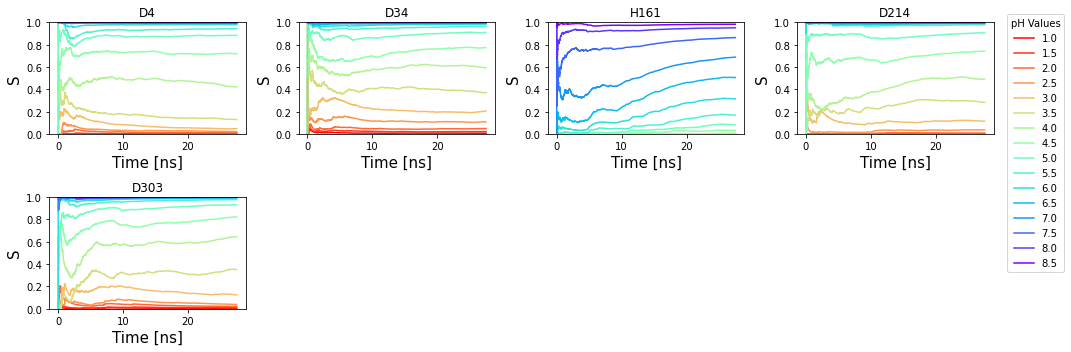

In [15]:
titles = ['D4', 'D34', 'H161', 'D214', 'D303']
plotting.plot_running_s(ph_objects, phs, resids, titles, xlabel='Time [ns]', steps_to_time_conversion=(1/1000), save_fig=False, output='s_conv_apo.png')





## Calculate pKas 

In [16]:
pkas = pka(phs, ph_objects)

In [17]:
for n, pka in enumerate(pkas):
    if pka[0] == 'NaN' or (pka[0] > max(phs) or pka[0] < min(phs)):
        print('Resid: {0:3} pKa: No Titration'.format(ph_objects[0].ires[n]))
    else:
        print('Resid: {0:3} pKa: {1:>3.2f} Hill: {2:>3.2f}'.format(ph_objects[0].ires[n], pka[0], pka[1]))

Resid:   4 pKa: 4.15 Hill: 1.11
Resid:   7 pKa: 3.73 Hill: 0.76
Resid:  10 pKa: 2.35 Hill: 0.65
Resid:  19 pKa: 4.76 Hill: 0.80
Resid:  21 pKa: 4.72 Hill: 0.82
Resid:  24 pKa: 3.21 Hill: 0.75
Resid:  34 pKa: 3.78 Hill: 0.76
Resid:  56 pKa: No Titration
Resid:  59 pKa: 2.62 Hill: 0.88
Resid:  67 pKa: 3.29 Hill: 0.84
Resid:  69 pKa: 2.82 Hill: 0.78
Resid:  74 pKa: 3.53 Hill: 0.74
Resid:  89 pKa: 3.18 Hill: 0.63
Resid: 104 pKa: 3.27 Hill: 0.83
Resid: 107 pKa: 3.74 Hill: 0.94
Resid: 112 pKa: 5.21 Hill: 0.74
Resid: 121 pKa: 3.42 Hill: 0.79
Resid: 130 pKa: 3.71 Hill: 0.72
Resid: 137 pKa: 2.33 Hill: 0.86
Resid: 142 pKa: 4.75 Hill: 0.77
Resid: 150 pKa: 4.02 Hill: 0.90
Resid: 161 pKa: 6.47 Hill: 0.74
Resid: 162 pKa: 2.88 Hill: 0.81
Resid: 164 pKa: No Titration
Resid: 174 pKa: 4.12 Hill: 0.90
Resid: 175 pKa: 3.85 Hill: 0.80
Resid: 179 pKa: 3.72 Hill: 0.89
Resid: 185 pKa: 3.46 Hill: 0.72
Resid: 189 pKa: 6.73 Hill: 0.75
Resid: 190 pKa: 3.98 Hill: 0.78
Resid: 198 pKa: 3.62 Hill: 0.90
Resid: 200 pKa

# Plot Titration Curves

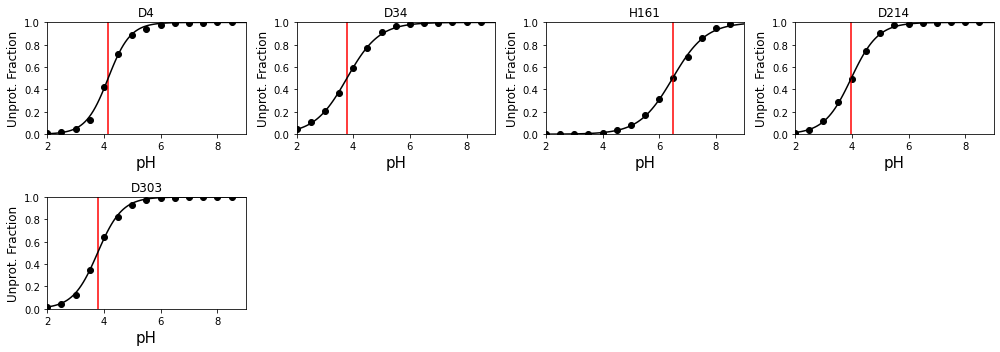

In [18]:
plotting.plot_titration_curves(ph_objects, phs, resids, titles, xrange=[2,9])

## Save Data

In [37]:
with open('../data/apo_D34_D214_S_s11_to_64.dat', 'w') as o:
    o.write('# pH, S_D34, S_D214 \n')
    for n, ph in enumerate(phs):
        #print(f'{ph} {ph_objects[n].s[6]:0.2f} {ph_objects[n].s[33]:0.2f}')
        o.write(f'{ph} {ph_objects[n].s[6]:0.2f} {ph_objects[n].s[33]:0.2f} \n')
    o.write('## D34 pKa, D34 Hill \n')
    o.write(f'#! {pkas[6][0]:0.2f} {pkas[6][1]:0.2f} \n')
    o.write('## D214 pKa, D214 Hill \n')
    o.write(f'#! {pkas[33][0]:0.2f} {pkas[33][1]:0.2f} \n')

# Analyse and Plot the Log Files

In [19]:
log_files = []

for stage in stages:
    sub_log_files = []
    for n in range(0, 24):
        sub_log_files.append(g.glob('{}/stage{}/*log_{}'.format(path, stage, n))[0])
    log_files.append(sub_log_files)

In [20]:
print('Number of Stage (list height): {}'.format(len(log_files)))
print('Number of Replicas (list width): {}'.format(len(log_files[0])))

Number of Stage (list height): 55
Number of Replicas (list width): 24


In [21]:
log_data = cphmd.log_analysis_charmm(log_files)

In [22]:
for dat in log_data.exchange_frq:
    print("Exchange Frequency Between Replicas {0:>2.0f} - {1:>2.0f}: {2:0.2f}".format(dat[0], dat[1], dat[2]))

Exchange Frequency Between Replicas  0 -  1: 0.49
Exchange Frequency Between Replicas  1 -  2: 0.38
Exchange Frequency Between Replicas  2 -  3: 0.55
Exchange Frequency Between Replicas  3 -  4: 0.46
Exchange Frequency Between Replicas  4 -  5: 0.46
Exchange Frequency Between Replicas  5 -  6: 0.43
Exchange Frequency Between Replicas  6 -  7: 0.37
Exchange Frequency Between Replicas  7 -  8: 0.34
Exchange Frequency Between Replicas  8 -  9: 0.35
Exchange Frequency Between Replicas  9 - 10: 0.36
Exchange Frequency Between Replicas 10 - 11: 0.35
Exchange Frequency Between Replicas 11 - 12: 0.37
Exchange Frequency Between Replicas 12 - 13: 0.41
Exchange Frequency Between Replicas 13 - 14: 0.44
Exchange Frequency Between Replicas 14 - 15: 0.27
Exchange Frequency Between Replicas 15 - 16: 0.38
Exchange Frequency Between Replicas 16 - 17: 0.39
Exchange Frequency Between Replicas 17 - 18: 0.41
Exchange Frequency Between Replicas 18 - 19: 0.43
Exchange Frequency Between Replicas 19 - 20: 0.66


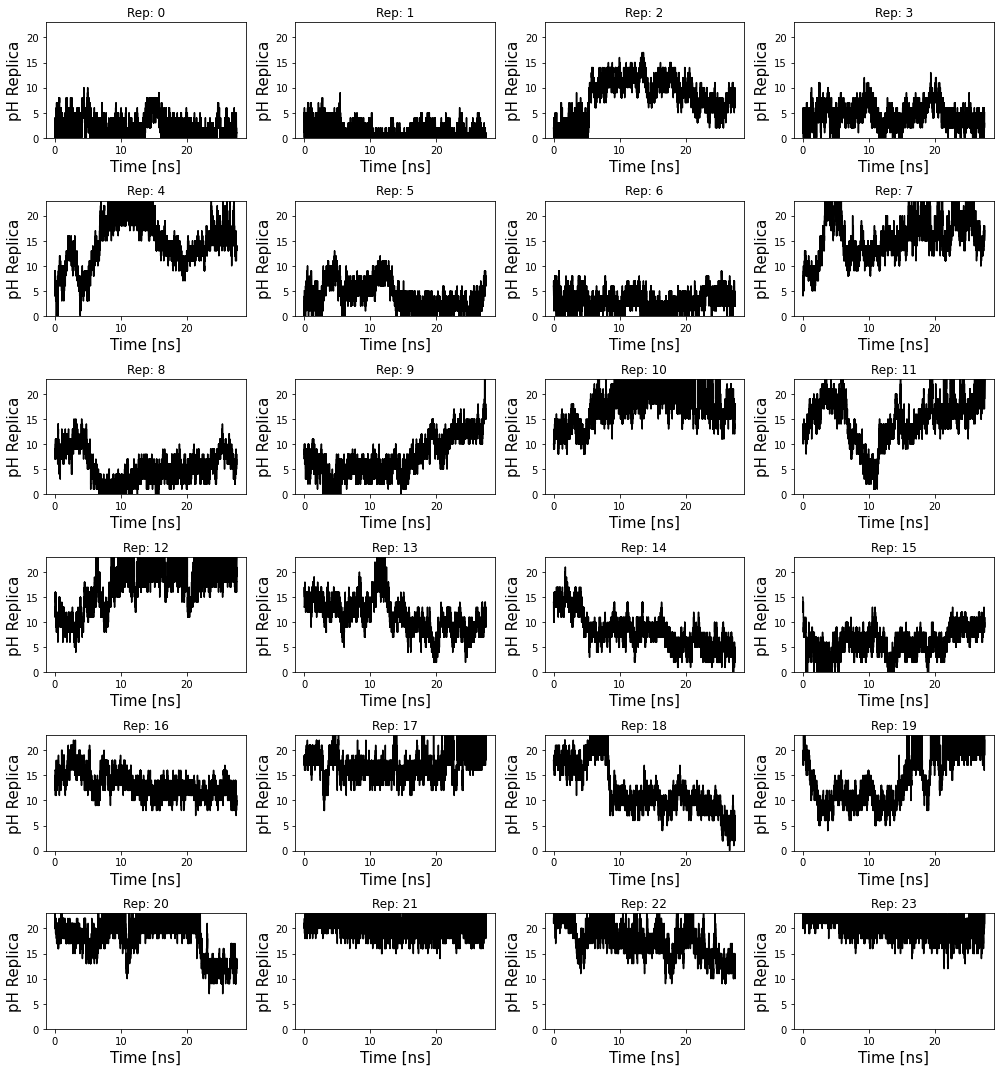

In [23]:
log_data.plot_replica_walk(xlabel='Time [ns]',  steps_to_time_conversion=(1/1000))